In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import regex as re
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h1>
    Import raw data files
</h1>

In [122]:
literacy_raw = pd.read_excel("./mp_raw_literacy_cleaned_9_Sep_1_Oct_v3.xlsx", index_col='_id')
numeracy_raw = pd.read_excel("./mp_raw_numeracy_cleaned_9_Sep_1_Oct_v3.xlsx", index_col='_id')

In [123]:
def total_score(scores):
    total_score = 0
    for score in scores:
        if score == 1:
            total_score += 1
    return total_score

In [124]:
general_info =['tabletUserName', 'assessment_date', 'school_details.State_label', 'school_details.District_label', \
               'school_details.Block_label', 'school_details.School_label', 'school_details.UDISE_cd_label']

student_info = ['SI_std_name', 'student_age', 'student_gender']

mp_total_scores = literacy_raw[general_info + student_info].set_index(literacy_raw.index)

In [125]:
mp_total_scores

tabletUserName assessment_date  \
_id                                                                   
0050c62f-02ba-4cc6-bb95-bf76e33e5069         Jeevan      2022-09-17   
00d4fdf3-5016-4037-a386-148bf838ff90          Kajal      2022-09-23   
010fada9-996a-49c2-a8af-bdb6c5c688a3        Rahnuma      2022-09-16   
015e4b93-016a-457c-8987-65a7a048b051        Vaibhav      2022-09-23   
0170015d-21f2-4342-a66e-bd9ad6f49162          Nanda      2022-09-16   
0180327f-16d3-49d9-9ea5-971a8ae20f57          Seema      2022-09-14   
0184f234-c120-4640-8e53-0071d2b5ec11          Kajal      2022-09-21   
01c7e032-f3f8-4987-85cb-a2e54fbbbae9          Kirti      2022-09-21   
01d68d6f-12e2-47de-99d2-d5bad8643286         Sadhna      2022-09-20   
022ba980-6fa8-4e72-aef8-2ccf8ed34cb7        Radhika      2022-09-22   
025307f6-fd96-4fb6-813a-8a2f5c5c0a2a        Rahnuma      2022-09-22   
0279bfda-e31d-4d9d-94a1-10e10e9a71a2           Neha      2022-09-15   
028e5fe2-4bfa-4eff-88b1-aa6ec3932285           Neha      2022-09-12   
028f5ee2-9e97-4278-ac6e-61209ef8955d        Radhika      2022-09-16   
029bfb71-9774-4c6c-be44-67dafe2e1c29        Radhika      2022-09-13   
02a5a7c7-3b92-4a41-b179-49a0052c650c        Jharuni      2022-09-15   
02d2ace4-0dbe-4fcb-9d67-52efe7316843          Laxmi      2022-09-21   
032c288f-7a9c-4b7d-8935-e78059598125         Sadhna      2022-09-23   
0369a54f-146b-49f8-9e13-3063ee2f20b3          Nanda      2022-09-09   
03fc785a-5589-409f-b4be-b456a34b61af         Vikram      2022-09-19   
04dbacab-042c-4bfa-893d-1b7a5573a681         Jeevan      2022-09-14   
04f1a9f2-0f11-4606-a2db-c6b1225a0462        Rahnuma      2022-09-17   
052589ce-5d0f-4afa-8b98-16e55ba681b7        Radhika      2022-09-13   
0630bea3-0ee1-4db8-bd01-a908f2bd7bef        Rahnuma      2022-09-22   
0632ce65-25b8-4f5c-bf77-2e8cfa28245c        Jharuni      2022-09-13   
06888db1-5378-4b2f-beda-d0a9ae4bd25b         Vikram      2022-09-23   
07239d6f-b800-4853-91e8-ce61d7564aed        Radhika      2022-09-17   
072ac9c8-36f3-4b62-a79b-03a19807b91b        Vaibhav      2022-09-21   
080165fe-d5ea-4db7-bfb0-7e04152cbe33         Tanuja      2022-09-20   
084e4b04-9389-4f5c-b36f-7489b03fba70        Manohar      2022-09-22   
09435d9a-6f51-45ab-aee3-e85d312d5e94        Radhika      2022-09-14   
09a797af-0195-45bc-a6d9-951a0cb2f9bf        Kashish      2022-09-20   
09d201ad-8fd2-48be-9600-ed80f93eb016         Anjali      2022-09-20   
09e184c2-40b0-4834-9ec9-c5436b6acbe3         Poonam      2022-09-10   
09e84af8-1876-46e5-91ed-847e82882b5f        Vaibhav      2022-09-16   
0a55c120-8b48-4dfd-9b50-d99bce6e8b3f        Radhika      2022-09-22   
0a72b4a8-e1ac-4c2f-8465-12791c090409         Kumkum      2022-09-21   
0ae0e342-e139-4bf3-9a67-feadfa82448d          Kajal      2022-09-10   
0b21da54-3e71-4cef-ba33-1f89420a0679        Radhika      2022-09-09   
0b2c2fc3-72fe-489d-8a99-bfa02f3c3cc6          Kirti      2022-09-23   
0bb2c183-260f-4f62-9b86-c7dbd76766c0        Vaibhav      2022-09-21   
0bf3e597-2895-4890-9f12-24db02b8487b         Jeevan      2022-09-13   
0c0a1cdb-1b48-47c2-afcc-2cf2070c6e24         Pavika      2022-09-21   
0c4653c0-5e33-44ba-9da3-aabe5bd0886f         Jeevan      2022-09-20   
0cdb4cc3-e244-46af-80df-71a6417b6568           Neha      2022-09-20   
0efb6545-ac11-4af5-93e2-f6c3004c5b5d        Radhika      2022-09-20   
0f0016d8-bfd2-45c9-9a98-669e9c70c864         Tanuja      2022-09-10   
0f4939c4-ef8e-4cda-95bd-4183936a9847        Manohar      2022-09-13   
0f4bc380-db15-489f-ab51-2bc7c1500adc         Anjali      2022-09-10   
0fb88ba3-dea0-4c45-be8d-e153da9c0437          Nanda      2022-09-13   
0fd13ef8-8637-4b03-bf29-0ee9b230fa4f           Neha      2022-09-22   
0ffaacc5-9941-4d54-8d11-89917bf68e57        Kashish      2022-09-20   
100b5e08-4abc-4ab8-b705-d67119d87315         Pavika      2022-09-13   
102cbb94-e9c9-4e98-af09-16c3d8b0c125         Pavika      2022-09-17   
102f4e86-2d5c-4cbb-9dc4-87d4c72a21f5         Sadhna      2022

In [127]:
literacy_raw.columns.to_list()

['Unnamed: 0',
 'tabletUserName',
 'assessment_date',
 'school_details.State_label',
 'school_details.District_label',
 'school_details.Block_label',
 'school_details.School_label',
 'school_details.UDISE_cd_label',
 'SI_std_name',
 'student_age',
 'student_gender',
 'literacy1_q1',
 'literacy1_q1_or',
 'literacy1_q2',
 'literacy1_q2_or',
 'literacy1_q3',
 'literacy1_q3_or',
 'literacy1_q4',
 'literacy1_q4_or',
 'literacy1_end',
 'literacy2_p_q',
 'literacy2_q1',
 'literacy2_q2',
 'literacy2_q3',
 'literacy2_q4',
 'literacy2_q5',
 'literacy2_q6',
 'literacy2_q7',
 'literacy2_q8',
 'literacy2_q10',
 'literacy2_end',
 'literacy2_q1_or',
 'literacy2_q2_or',
 'literacy2_q3_or',
 'literacy2_q4_or',
 'literacy2_q5_or',
 'literacy2_q6_or',
 'literacy2_q7_or',
 'literacy2_q8_or',
 'literacy2_q9',
 'literacy2_q9_or',
 'literacy2_q10_or',
 'literacy3_p_q1',
 'literacy3_p_q2',
 'literacy3_q1',
 'literacy3_q2',
 'literacy3_q3',
 'literacy3_q4',
 'literacy3_q5',
 'literacy3_q6',
 'literacy3_q7',
 '

<h1 style="color:blue;">
    Literary Sub-task Score Calculations
</h1>

<h3>
    Literacy 1: Listening Comprehension
</h3>

In [128]:
# Calculate total score on listening comprehension sub-task
literacy1 = [col for col in literacy_raw.columns if re.search(r'literacy1_q\d$', col)]
                                                         
mp_total_scores.loc[:, 'literacy1_total'] = literacy_raw.apply(lambda x: total_score([x[col] for col in literacy1]), axis=1)

In [129]:
# Extract other responses to oral vocabulary questions
literacy1_or = [col for col in literacy_raw.columns if re.search(r'literacy1\S*or$', col)]
with pd.ExcelWriter('literacy1_other_responses.xlsx') as writer: 
    for col in literacy1_or:
        literacy_raw[col].value_counts().reset_index().rename(columns = {'index':"Child's response", col:'Frequency'}).to_excel(writer, sheet_name=col)

<h3>
    Literacy 2: Oral Vocabulary
</h3>

In [130]:
# Calculate total score on oral comprehension sub-task
literacy2 = [col for col in literacy_raw.columns if re.search(r'literacy2_q\d+$', col)]
                                                         
mp_total_scores.loc[:, 'literacy2_total'] = literacy_raw.apply(lambda x: total_score([x[col] for col in literacy2]), axis=1)

In [131]:
# Extract other responses to oral vocabulary questions
literacy2_or = [col for col in literacy_raw.columns if re.search(r'literacy2\S*or$', col)]
with pd.ExcelWriter('literacy2_other_responses.xlsx') as writer: 
    for col in literacy2_or:
        literacy_raw[col].value_counts().reset_index().rename(columns = {'index':"Child's response", col:'Frequency'}).to_excel(writer, sheet_name=col)

<h3>
    Literacy 3: Initial Sound Identification
</h3>

In [132]:
# Calculate total score on initial sound identification sub-task
literacy3 = [col for col in literacy_raw.columns if re.search(r'literacy3_q+', col)]
                                                         
mp_total_scores.loc[:, 'literacy3_total'] = literacy_raw.apply(lambda x: total_score([x[col] for col in literacy3]), axis=1)

<h3>
    Literacy 4: Letter Recognition (Untimed)
</h3>

In [133]:
literacy4_ut = [col for col in literacy_raw.columns if re.search(r'literacy4_ut_grid_\d*$', col)]
    
# Calculate total score on letter naming (untimed) sub-task
mp_total_scores.loc[:, 'literacy4_ut_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy4_ut]), axis=1)

<h3>
    Literacy 4: Letter Recognition (Timed)
</h3>

In [134]:
literacy4_tt =  [col for col in literacy_raw.columns if re.search(r'literacy4_tt_grid_\d*$', col)]

# Calculate total score on letter naming (timed) sub-task
mp_total_scores.loc[:, 'literacy4_tt_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy4_tt]), axis=1)

<h3>
    Literacy 5: Familiar Words Reading (Untimed)
</h3>

In [135]:
literacy5_ut = [col for col in literacy_raw.columns if re.search(r'literacy5_ut_grid_\d*$', col)]
    
mp_total_scores.loc[:, 'literacy5_ut_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy5_ut]), axis=1)

<h3>
    Literacy 5: Familiar Words Reading (Timed)
</h3>

In [137]:
literacy5_tt = [col for col in literacy_raw.columns if re.search(r'literacy5_tt_grid_\d*$', col)]

mp_total_scores.loc[:, 'literacy5_tt_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy5_tt]), axis=1)

<h3>
    Literacy 6: Non-word Reading
</h3>

In [138]:
literacy6 = [col for col in literacy_raw.columns if re.search(r'literacy6_tt_grid_\d*$', col)]

mp_total_scores.loc[:, 'literacy6_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy6]), axis=1)

<h3>
    Literacy 7: Oral Reading Fluency (Timed)
</h3>

In [139]:
literacy7 = [col for col in literacy_raw.columns if re.search(r'literacy7_tt_grid_\d*$', col)]

mp_total_scores.loc[:, 'literacy7_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy7]), axis=1)

<h3>
    Literacy 8: Reading Comprehension (Untimed)
</h3>

In [140]:
literacy8_reading = [col for col in literacy_raw.columns if re.search(r'literacy8_ut_grid_\d*$', col)]

literacy8_comprehension = [col for col in literacy_raw.columns if re.search(r'literacy8_ut_q\d*$', col)]

mp_total_scores.loc[:, 'literacy8_reading_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy8_reading]), axis=1)

mp_total_scores.loc[:, 'literacy8_comprehension_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy8_comprehension]), axis=1)

<h3>
    Literacy 9a: Dictation (Letters)
</h3>

In [141]:
literacy9a = [col for col in literacy_raw.columns if re.search(r'literacy9a_ut_grid_\d*$', col)]

mp_total_scores.loc[:, 'literacy9a_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy9a]), axis=1)

<h3>
    Literacy 9a: Dictation (Words)
</h3>

In [142]:
literacy9b = [col for col in literacy_raw.columns if re.search(r'literacy9b_ut_grid_\d*$', col)]

mp_total_scores.loc[:, 'literacy9b_total'] = literacy_raw.apply(lambda x: total_score([x[score] for score in literacy9b]), axis=1)

In [143]:
mp_total_scores

tabletUserName assessment_date  \
_id                                                                   
0050c62f-02ba-4cc6-bb95-bf76e33e5069         Jeevan      2022-09-17   
00d4fdf3-5016-4037-a386-148bf838ff90          Kajal      2022-09-23   
010fada9-996a-49c2-a8af-bdb6c5c688a3        Rahnuma      2022-09-16   
015e4b93-016a-457c-8987-65a7a048b051        Vaibhav      2022-09-23   
0170015d-21f2-4342-a66e-bd9ad6f49162          Nanda      2022-09-16   
0180327f-16d3-49d9-9ea5-971a8ae20f57          Seema      2022-09-14   
0184f234-c120-4640-8e53-0071d2b5ec11          Kajal      2022-09-21   
01c7e032-f3f8-4987-85cb-a2e54fbbbae9          Kirti      2022-09-21   
01d68d6f-12e2-47de-99d2-d5bad8643286         Sadhna      2022-09-20   
022ba980-6fa8-4e72-aef8-2ccf8ed34cb7        Radhika      2022-09-22   
025307f6-fd96-4fb6-813a-8a2f5c5c0a2a        Rahnuma      2022-09-22   
0279bfda-e31d-4d9d-94a1-10e10e9a71a2           Neha      2022-09-15   
028e5fe2-4bfa-4eff-88b1-aa6ec3932285           Neha      2022-09-12   
028f5ee2-9e97-4278-ac6e-61209ef8955d        Radhika      2022-09-16   
029bfb71-9774-4c6c-be44-67dafe2e1c29        Radhika      2022-09-13   
02a5a7c7-3b92-4a41-b179-49a0052c650c        Jharuni      2022-09-15   
02d2ace4-0dbe-4fcb-9d67-52efe7316843          Laxmi      2022-09-21   
032c288f-7a9c-4b7d-8935-e78059598125         Sadhna      2022-09-23   
0369a54f-146b-49f8-9e13-3063ee2f20b3          Nanda      2022-09-09   
03fc785a-5589-409f-b4be-b456a34b61af         Vikram      2022-09-19   
04dbacab-042c-4bfa-893d-1b7a5573a681         Jeevan      2022-09-14   
04f1a9f2-0f11-4606-a2db-c6b1225a0462        Rahnuma      2022-09-17   
052589ce-5d0f-4afa-8b98-16e55ba681b7        Radhika      2022-09-13   
0630bea3-0ee1-4db8-bd01-a908f2bd7bef        Rahnuma      2022-09-22   
0632ce65-25b8-4f5c-bf77-2e8cfa28245c        Jharuni      2022-09-13   
06888db1-5378-4b2f-beda-d0a9ae4bd25b         Vikram      2022-09-23   
07239d6f-b800-4853-91e8-ce61d7564aed        Radhika      2022-09-17   
072ac9c8-36f3-4b62-a79b-03a19807b91b        Vaibhav      2022-09-21   
080165fe-d5ea-4db7-bfb0-7e04152cbe33         Tanuja      2022-09-20   
084e4b04-9389-4f5c-b36f-7489b03fba70        Manohar      2022-09-22   
09435d9a-6f51-45ab-aee3-e85d312d5e94        Radhika      2022-09-14   
09a797af-0195-45bc-a6d9-951a0cb2f9bf        Kashish      2022-09-20   
09d201ad-8fd2-48be-9600-ed80f93eb016         Anjali      2022-09-20   
09e184c2-40b0-4834-9ec9-c5436b6acbe3         Poonam      2022-09-10   
09e84af8-1876-46e5-91ed-847e82882b5f        Vaibhav      2022-09-16   
0a55c120-8b48-4dfd-9b50-d99bce6e8b3f        Radhika      2022-09-22   
0a72b4a8-e1ac-4c2f-8465-12791c090409         Kumkum      2022-09-21   
0ae0e342-e139-4bf3-9a67-feadfa82448d          Kajal      2022-09-10   
0b21da54-3e71-4cef-ba33-1f89420a0679        Radhika      2022-09-09   
0b2c2fc3-72fe-489d-8a99-bfa02f3c3cc6          Kirti      2022-09-23   
0bb2c183-260f-4f62-9b86-c7dbd76766c0        Vaibhav      2022-09-21   
0bf3e597-2895-4890-9f12-24db02b8487b         Jeevan      2022-09-13   
0c0a1cdb-1b48-47c2-afcc-2cf2070c6e24         Pavika      2022-09-21   
0c4653c0-5e33-44ba-9da3-aabe5bd0886f         Jeevan      2022-09-20   
0cdb4cc3-e244-46af-80df-71a6417b6568           Neha      2022-09-20   
0efb6545-ac11-4af5-93e2-f6c3004c5b5d        Radhika      2022-09-20   
0f0016d8-bfd2-45c9-9a98-669e9c70c864         Tanuja      2022-09-10   
0f4939c4-ef8e-4cda-95bd-4183936a9847        Manohar      2022-09-13   
0f4bc380-db15-489f-ab51-2bc7c1500adc         Anjali      2022-09-10   
0fb88ba3-dea0-4c45-be8d-e153da9c0437          Nanda      2022-09-13   
0fd13ef8-8637-4b03-bf29-0ee9b230fa4f           Neha      2022-09-22   
0ffaacc5-9941-4d54-8d11-89917bf68e57        Kashish      2022-09-20   
100b5e08-4abc-4ab8-b705-d67119d87315         Pavika      2022-09-13   
102cbb94-e9c9-4e98-af09-16c3d8b0c125         Pavika      2022-09-17   
102f4e86-2d5c-4cbb-9dc4-87d4c72a21f5         Sadhna      2022

<h2>
    B. Numeracy Sub-tasks Data Cleaning
</h2>

In [739]:
# Create dataframe to store sub-task total scores and percentages
mp_numeracy = pd.DataFrame()

general_info =['tabletUserName', 'assessment_date', 'school_details.State_label', 'school_details.District_label', \
               'school_details.Block_label', 'school_details.School_label', 'school_details.UDISE_cd_label']

student_info = ['SI_std_name', 'student_age', 'student_gender']

numeracy1 = [col for col in mp_raw_numeracy.columns if re.search(r'^numeracy1_tt\w*', col)]

numeracy2_ut = [col for col in mp_raw_numeracy.columns if re.search(r'^numeracy2_ut\w*', col)]

numeracy2_tt = [col for col in mp_raw_numeracy.columns if re.search(r'^numeracy2_tt\w*', col)]
       
numeracy3 = [col for col in mp_raw_numeracy.columns if re.search(r'^numeracy3_ut\w*', col)]

numeracy4 = [col for col in mp_raw_numeracy.columns if re.search(r'^numeracy4_ut\S*', col)]

numeracy5 = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy5_ut\S*', col)]

numeracy6 = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy6_ut\S*', col)]
    
numeracy7 = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy7_ut\S*', col)]

numeracy8 = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy8_ut\S*', col)]

numeracy9a = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy9a_ut\S', col)]

numeracy9b = [col for col in mp_raw_numeracy.columns if re.search(r'numeracy9b_ut\S', col)]

mp_numeracy = mp_raw_numeracy[general_info + student_info + numeracy1 + numeracy2_ut + numeracy2_tt + numeracy3 + numeracy4 + numeracy5 + numeracy6 + numeracy7 + numeracy8 + numeracy9a + numeracy9b].copy()

mp_numeracy.loc[:, 'student_gender'] = mp_numeracy.loc[:, 'student_gender'].apply(lambda x: 'Male' if x=='0' else 'Female')

<h3>
    Numeracy 1: Counting
</h3>

In [740]:
# Check data for'UNDEFINED' or 'SKIPPED' values
counting_raw = [col for col in numeracy1 if re.search(r'numeracy1_tt_grid_', col)]
for col in counting_raw:
#     print(col, mp_numeracy[col].unique())
    mp_numeracy[col].replace('.', '999', inplace=True)

<h3>
    Numeracy 2: Number Recognition (Untimed)
</h3>

In [741]:
# Check data for'UNDEFINED' or 'SKIPPED' values
num_recog_untimed = [col for col in numeracy2_ut if re.search(r'numeracy2_ut_grid_', col)]
for col in num_recog_untimed:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].replace('.', '999', inplace=True)

numeracy2_ut_grid_1 ['0' '1']
numeracy2_ut_grid_2 ['0' '1']
numeracy2_ut_grid_3 ['0' '1']
numeracy2_ut_grid_4 ['0' '1' '.']
numeracy2_ut_grid_5 ['.' '1' '0']
numeracy2_ut_grid_6 ['.' '1' '0']
numeracy2_ut_grid_7 ['.' '1' '0']
numeracy2_ut_grid_8 ['.' '0' '1']
numeracy2_ut_grid_9 ['.' '0' '1']
numeracy2_ut_grid_10 ['.' '0' '1']


<h3>
    Numeracy 2: Number Recognition (Timed)
</h3>

In [742]:
# Check data for'UNDEFINED' or 'SKIPPED' values
num_recog_timed = [col for col in numeracy2_tt if re.search(r'numeracy2_tt_grid_', col)]
for col in num_recog_timed:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].replace('.', '999', inplace=True)

numeracy2_tt_grid_1 ['0' '1']
numeracy2_tt_grid_2 ['0' '1' '.']
numeracy2_tt_grid_3 ['0' '1' '.']
numeracy2_tt_grid_4 ['0' '1' '.']
numeracy2_tt_grid_5 ['.' '1' '0']
numeracy2_tt_grid_6 ['.' '1' '0']
numeracy2_tt_grid_7 ['.' '1' '0']
numeracy2_tt_grid_8 ['.' '1' '0']
numeracy2_tt_grid_9 ['.' '1' '0']
numeracy2_tt_grid_10 ['.' '1' '0']
numeracy2_tt_grid_11 ['.' '1' '0']
numeracy2_tt_grid_12 ['.' '1' '0']
numeracy2_tt_grid_13 ['.' '1' '0']
numeracy2_tt_grid_14 ['.' '1' '0']
numeracy2_tt_grid_15 ['.' '0' '1']
numeracy2_tt_grid_16 ['.' '1' '0']
numeracy2_tt_grid_17 ['.' '0' '1']
numeracy2_tt_grid_18 ['.' '1' '0']
numeracy2_tt_grid_19 ['.' '0' '1']
numeracy2_tt_grid_20 ['.' '0' '1']


<h3>
    Numeracy 3: Number Comparison
</h3>

In [743]:
# Check data for'UNDEFINED' or 'SKIPPED' values
for col in numeracy3:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].replace('.', '999', inplace=True)
    mp_numeracy[col].fillna('999', inplace=True)

numeracy3_ut_q1 ['1' '0' '88']
numeracy3_ut_q2 ['0' '1' '88']
numeracy3_ut_q3 ['1' '88' '0']
numeracy3_ut_q4 ['1' '0' '88']
numeracy3_ut_q5 ['1' '0' nan '88']
numeracy3_ut_q6 ['0' '1' nan '88']
numeracy3_ut_q7 ['1' '0' nan '88']
numeracy3_ut_q8 ['1' '0' nan '88']
numeracy3_ut_q9 ['1' '0' nan '88']
numeracy3_ut_q10 ['0' '1' nan '88']


<h3>
    Numeracy 4: Counting in Bundles
</h3>

In [744]:
# Check data for'UNDEFINED' or 'SKIPPED' values
counting_in_bundles = [col for col in numeracy4 if re.search(r'numeracy4.+\d$', col)]
for col in counting_in_bundles:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
    mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy4_ut_q1 ['0' '1' '88']
numeracy4_ut_q2 ['88' '0' '1']
numeracy4_ut_q3 ['88' '0' '1']
numeracy4_ut_q4 ['88' '0' '1']


<h3>
    Numeracy 5: Missing Numbers
</h3>

In [745]:
# Check data for'UNDEFINED' or 'SKIPPED' values
missing_numbers = [col for col in numeracy5 if re.search(r'numeracy5.+\d$', col)]
for col in missing_numbers:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].fillna('999', inplace=True)
#     mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy5_ut_q1 ['88' '1' '0']
numeracy5_ut_q2 ['88' '1' '0']
numeracy5_ut_q3 ['88' '1' '0']
numeracy5_ut_q4 ['88' '0' '1']
numeracy5_ut_q5 [nan '0' '1' '88']
numeracy5_ut_q6 [nan '0' '88' '1']
numeracy5_ut_q7 [nan '0' '88' '1']
numeracy5_ut_q8 [nan '0' '88' '1']


<h3>
    Numeracy 6: Addition
</h3>

In [746]:
# Check data for'UNDEFINED' or 'SKIPPED' values
addition_raw = [col for col in numeracy6 if re.search(r'numeracy6.+\d$', col)]
for col in addition_raw:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].fillna('999', inplace=True)
#     mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy6_ut_q1 ['88' '1' '0']
numeracy6_ut_q2 ['88' '0' '1']
numeracy6_ut_q3 ['88' '1' '0']
numeracy6_ut_q4 ['88' '1' '0']
numeracy6_ut_q5 [nan '1' '88' '0']
numeracy6_ut_q6 [nan '1' '88' '0']
numeracy6_ut_q7 [nan '1' '88' '0']
numeracy6_ut_q8 [nan '1' '88' '0']


<h3>
    Numeracy 7: Subtraction
</h3>

In [747]:
# Check data for'UNDEFINED' or 'SKIPPED' values
subtraction_raw = [col for col in numeracy7 if re.search(r'numeracy7.+\d$', col)]
for col in subtraction_raw:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].fillna('999', inplace=True)
#     mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy7_ut_q1 ['88' '0' '1']
numeracy7_ut_q2 ['88' '0' '1']
numeracy7_ut_q3 ['88' '0' '1']
numeracy7_ut_q4 ['88' '0' '1']
numeracy7_ut_q5 [nan '0' '1' '88']
numeracy7_ut_q6 [nan '0' '88' '1']
numeracy7_ut_q7 [nan '0' '88' '1']
numeracy7_ut_q8 [nan '88' '0' '1']


<h3>
    Numeracy 8: Word Problems
</h3>

In [748]:
# Check data for'UNDEFINED' or 'SKIPPED' values
word_problems = [col for col in numeracy8 if re.search(r'numeracy8.+\d$', col)]
for col in word_problems:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].fillna('999', inplace=True)
#     mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy8_ut_q1 ['1' '88' '0']
numeracy8_ut_q2 ['88' '1' '0']
numeracy8_ut_q3 ['1' '88' '0']
numeracy8_ut_q4 ['0' '1' '88']
numeracy8_ut_q5 ['0' nan '88' '1']
numeracy8_ut_q6 ['0' nan '88' '1']


<h3>
    Numeracy 9a: Shape Recognition (Circle)
</h3>

In [752]:
# Check data for'UNDEFINED' or 'SKIPPED' values
shapes_circle = [col for col in numeracy9a if re.search(r'numeracy9a_ut_grid_', col)]
for col in shapes_circle:
    print(col, mp_numeracy[col].unique())
    mp_numeracy[col].fillna('999', inplace=True)
    mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy9a_ut_grid_1 ['1' '0' '999']
numeracy9a_ut_grid_2 ['1' '0' '999']
numeracy9a_ut_grid_3 ['1' '0' '999']
numeracy9a_ut_grid_4 ['0' '1' '999']
numeracy9a_ut_grid_5 ['1' '0' '999']
numeracy9a_ut_grid_6 ['1' '0' '999']
numeracy9a_ut_grid_7 ['1' '0' '999']
numeracy9a_ut_grid_8 ['1' '0' '999']


<h3>
    Numeracy 9a: Shape Recognition (Rectangle)
</h3>

In [754]:
# Check data for'UNDEFINED' or 'SKIPPED' values
shapes_rectangle = [col for col in numeracy9b if re.search(r'numeracy9b_ut_grid_', col)]
for col in shapes_rectangle:
    print(col, mp_numeracy[col].unique())
#     mp_numeracy[col].fillna('999', inplace=True)
#     mp_numeracy[col].replace('UNDEFINED', '999', inplace=True)
#     mp_numeracy[col].replace('SKIPPED', '999', inplace=True)

numeracy9b_ut_grid_1 ['1' '0']
numeracy9b_ut_grid_2 ['1' '0']
numeracy9b_ut_grid_3 ['0' '1']
numeracy9b_ut_grid_4 ['1' '0']
numeracy9b_ut_grid_5 ['1' '0']
numeracy9b_ut_grid_6 ['1' '0']
numeracy9b_ut_grid_7 ['1' '0']
numeracy9b_ut_grid_8 ['1' '0']


In [755]:
mp_numeracy.to_excel("mp_raw_numeracy_cleaned_9_Sep_1_Oct.xlsx")

<h1>
    Analysis
</h1>

In [318]:
mp_total_scores.groupby(['school_details.District_label'])['school_details.UDISE_cd_label'].nunique()

school_details.District_label
Guna        11
Sehore      70
Shajapur    59
Vidisha     11
Name: school_details.UDISE_cd_label, dtype: int64

In [319]:
mp_total_scores['school_details.District_label'].value_counts()

Sehore      335
Shajapur    330
Vidisha      54
Guna         50
Name: school_details.District_label, dtype: int64

In [323]:
mp_total_scores.to_excel("mp_literacy_total_scores_9-28.xlsx")

In [320]:
# for total in totals:
#     sns.displot(mp_total_scores, x=total, col='school_details.District_label').savefig(total)

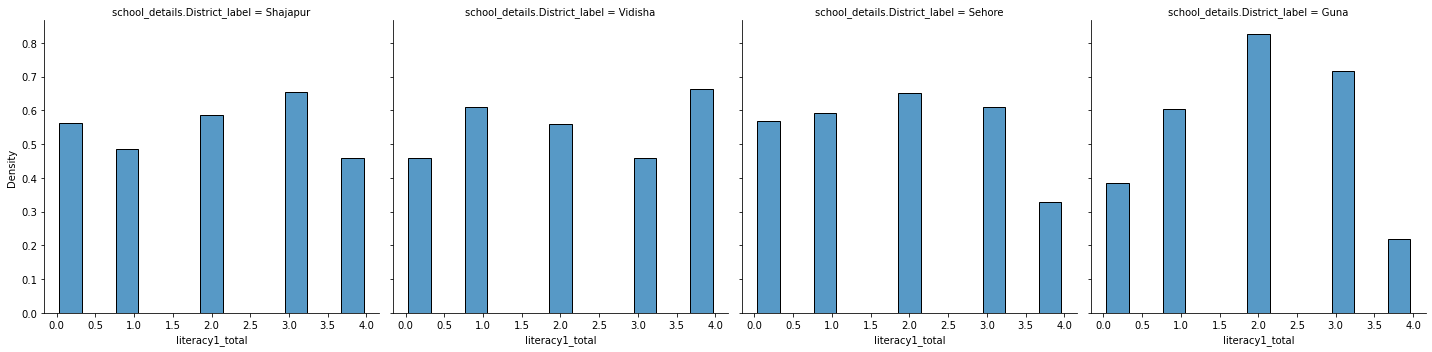

In [321]:
sns.displot(mp_total_scores, x='literacy1_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('listening_comprehension.jpg')

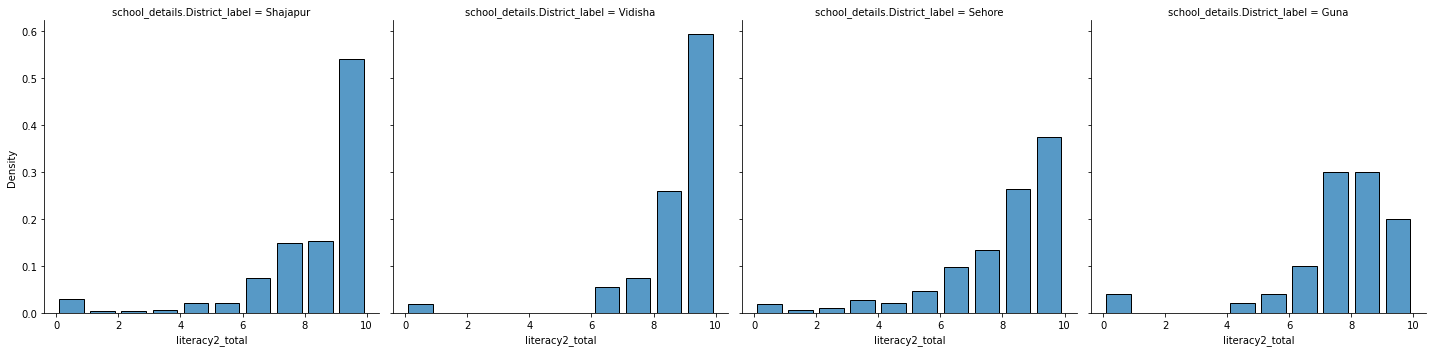

In [514]:
sns.displot(mp_total_scores, x='literacy2_total', col='school_details.District_label', bins=10, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('oral_vocabulary.jpg')

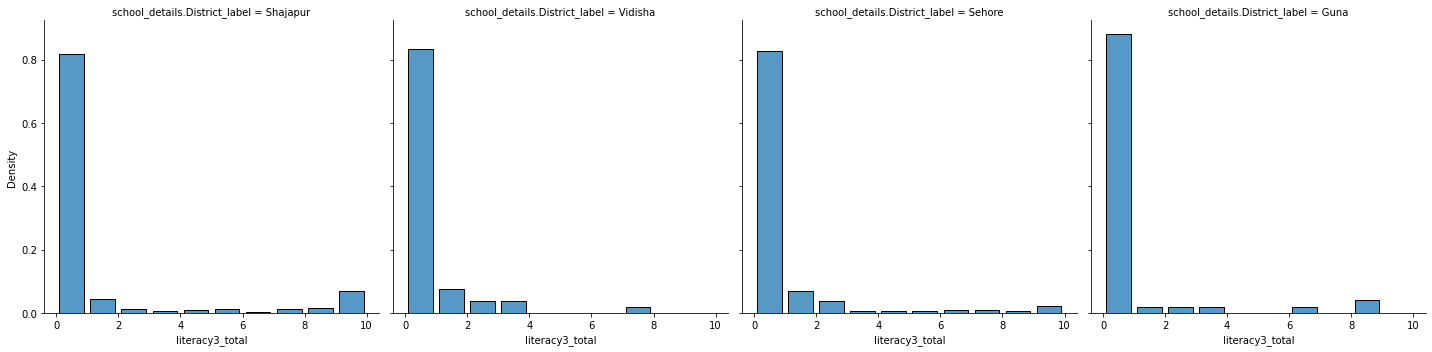

In [515]:
sns.displot(mp_total_scores, x='literacy3_total', col='school_details.District_label', bins=10, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('initial_sounds.jpg')

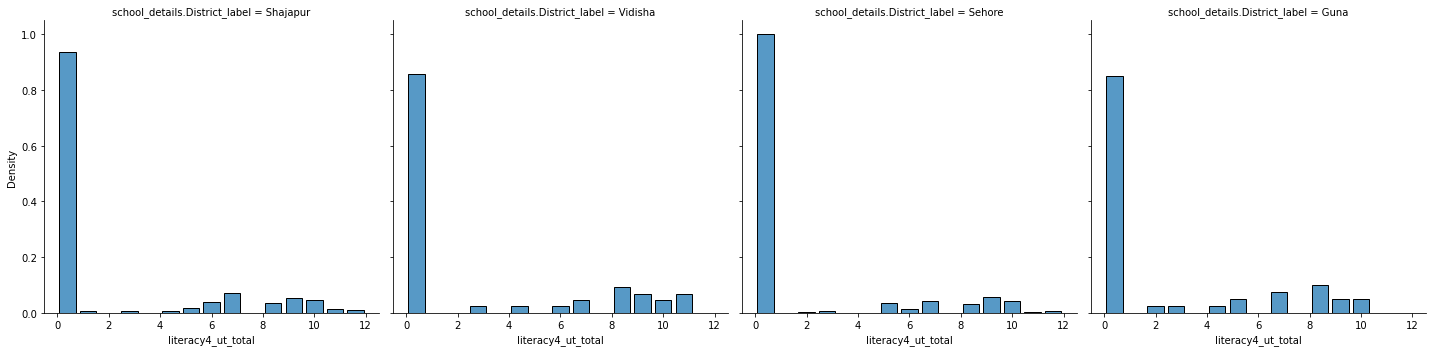

In [517]:
sns.displot(mp_total_scores, x='literacy4_ut_total', col='school_details.District_label', bins=15, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_naming_untimed.jpg')

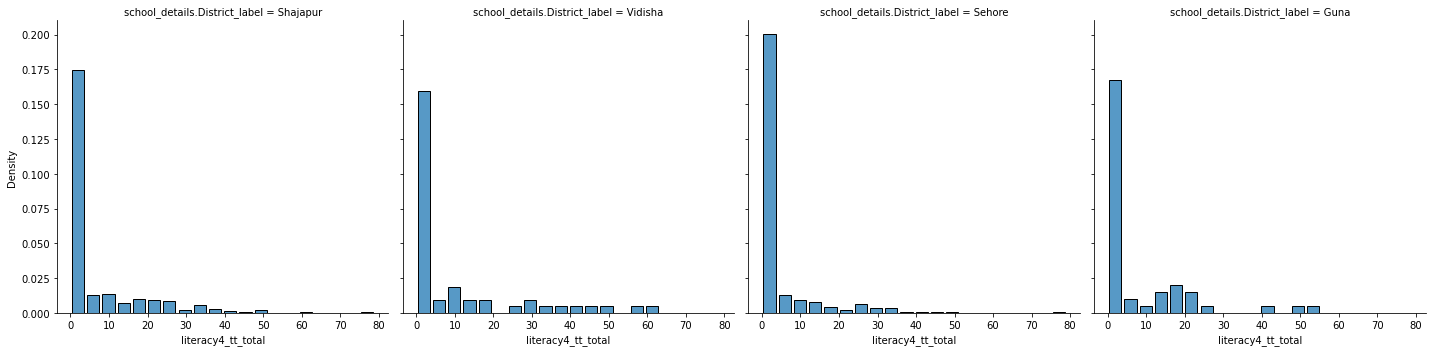

In [564]:
sns.displot(mp_total_scores, x='literacy4_tt_total', bins= 20, col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_naming_timed.jpg')

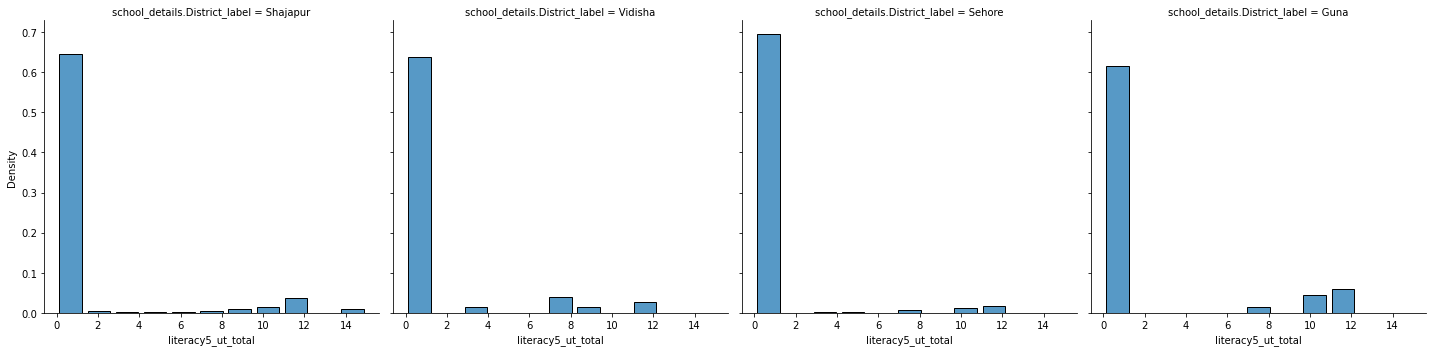

In [537]:
sns.displot(mp_total_scores, x='literacy5_ut_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('familiar_words_untimed.jpg')

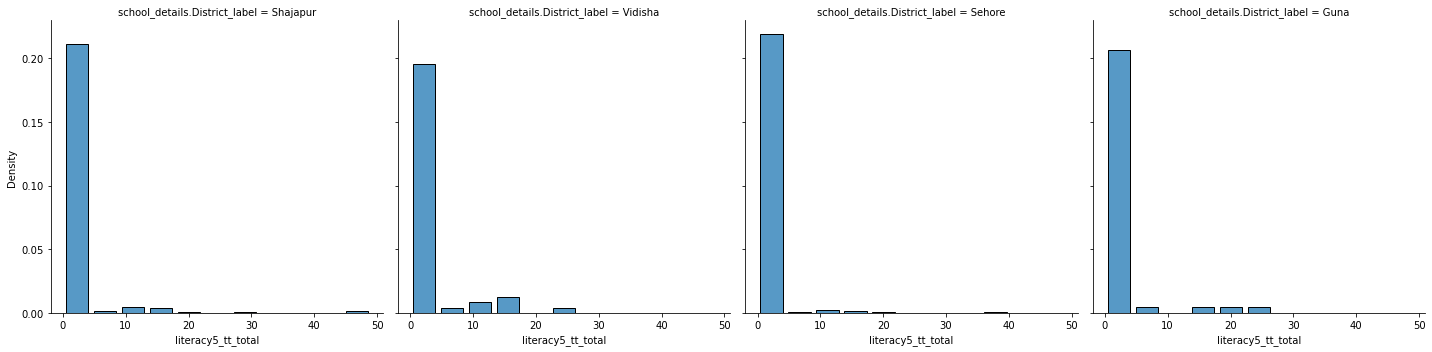

In [539]:
sns.displot(mp_total_scores, x='literacy5_tt_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('familiar_words_timed.jpg')

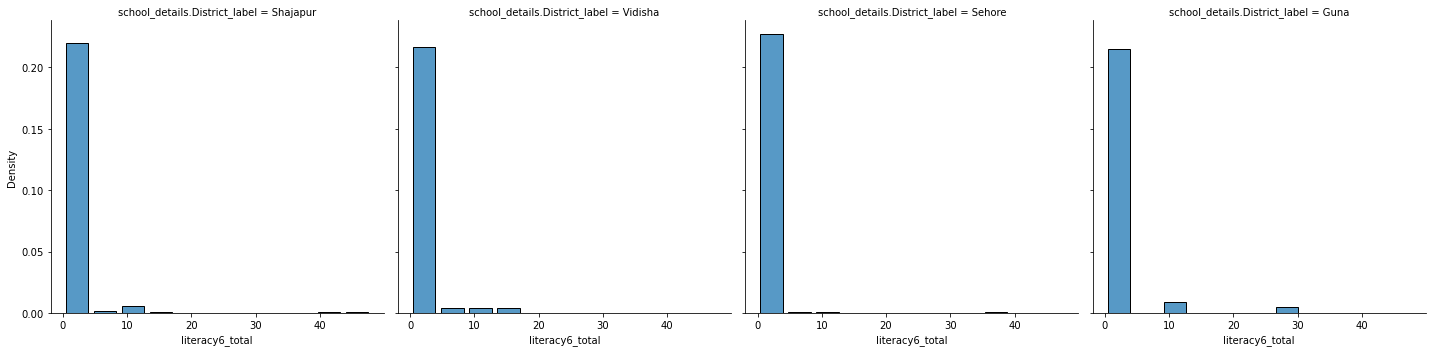

In [540]:
sns.displot(mp_total_scores, x='literacy6_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('non_words.jpg')

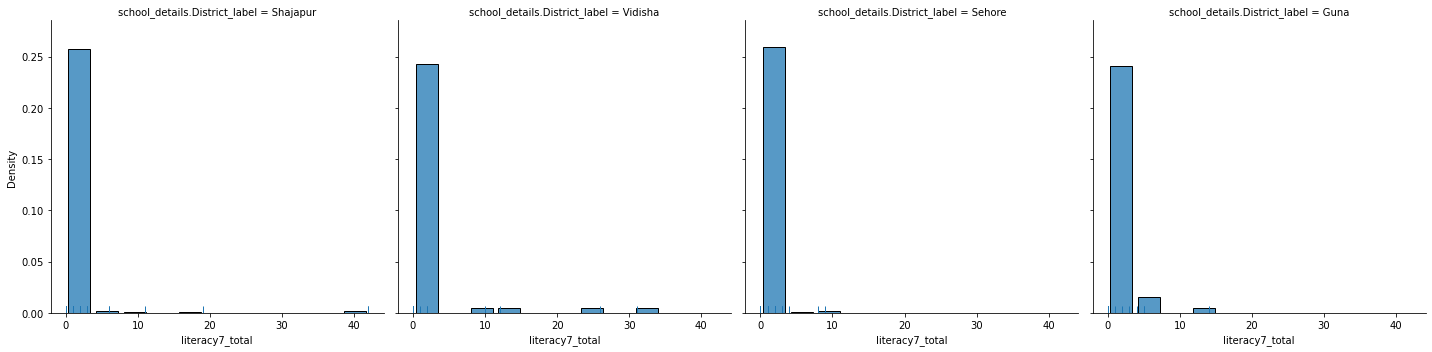

In [551]:
sns.displot(mp_total_scores, x='literacy7_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('orf.jpg')

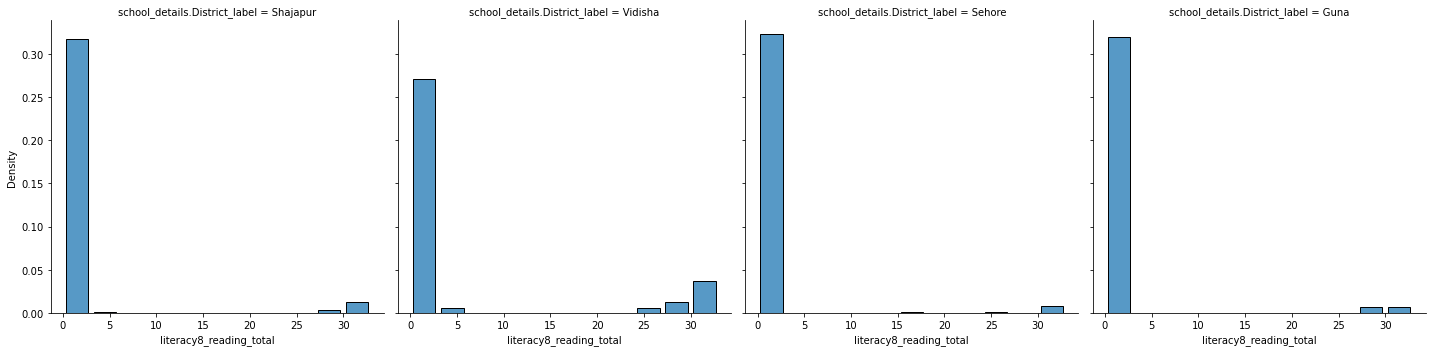

In [561]:
sns.displot(data=mp_total_scores, x='literacy8_reading_total', col='school_details.District_label', multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('reading_comprehension.jpg')

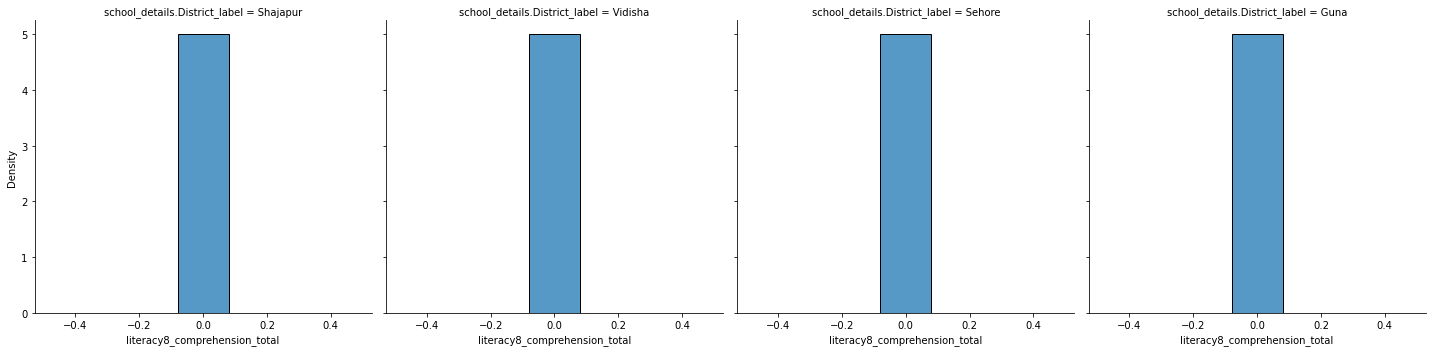

In [559]:
sns.displot(data=mp_total_scores, x='literacy8_comprehension_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('reading_comprehension_questions.jpg')

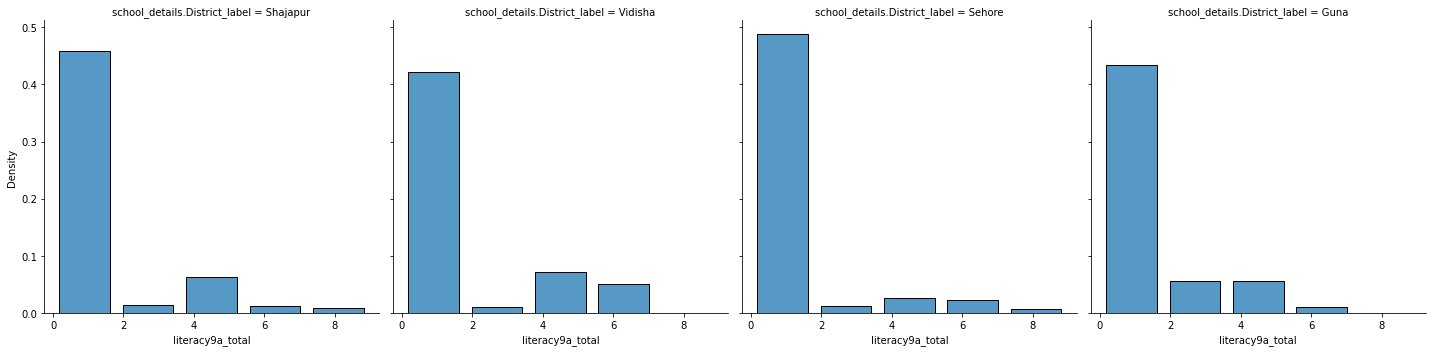

In [562]:
sns.displot(data=mp_total_scores, x='literacy9a_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('letter_writing.jpg')

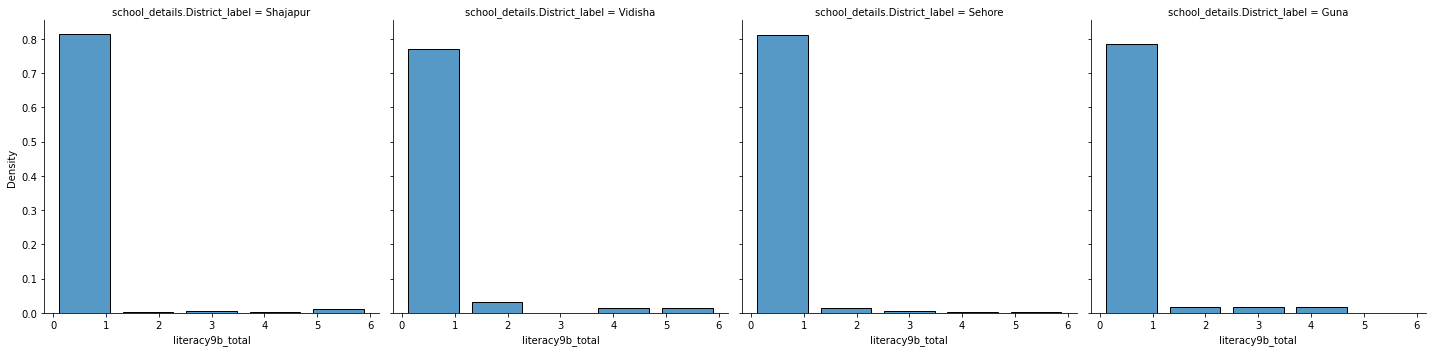

In [563]:
sns.displot(data=mp_total_scores, x='literacy9b_total', col='school_details.District_label',  bins=5, multiple="dodge", stat = 'density', shrink = 0.8, common_norm=False).savefig('word_writing.jpg')

<h1 style="color:blue;">
    Daily Dashboard
</h1>

In [22]:
# Create DataFrame for dashboard
mp_db = pd.DataFrame()

In [147]:
# db_cols = ['assessment_date',\
#            'user-profile.item1.first_name', \
#            'school_details.State_label', \
#            'school_details.District_label', \
#            'school_details.Block_label', \
#            'school_details.School_label', \
#            'school_details.UDISE_cd_label', \
#            'SI_std_name', \
#            'student_gender.1']
# mp_db = mp_raw[db_cols].copy()
# mp_db.rename(columns={'SI_std_name': 'student_name', 'student_gender.1': 'student_gender', 'user-profile.item1.first_name': 'evaluator', \
#                       'school_details.State_label': 'state', 'school_details.District_label': 'district', 'school_details.Block_label': 'block', \
#                       'school_details.School_label': 'school', 'school_details.UDISE_cd_label': 'udise'}, inplace=True)

# mp_db.loc[:, 'student_gender'] = mp_db.loc[:, 'student_gender'].apply(lambda x: 'Male' if x=='0' else 'Female')

In [146]:
# def merging_columns(dataset, column_dict):
#     for key in column_dict:
#         #dataset[key] = None
#         list_of_columns_to_merge = column_dict[key]
#         for j in dataset.index:
#             for i in list_of_columns_to_merge:
#                 if(dataset[i][j] != 'UNDEFINED'):
#                     dataset.loc[j, key] = dataset[i][j]
#                     break
#     return dataset

In [145]:
# update = {'Break_firstOpenTime': ['section_289de3eb6a60429984306530745f4813_firstOpenTime', 'Break_firstOpenTime']}
# mp_raw = merging_columns(mp_raw, update)
# # new_data[new_data['Break_firstOpenTime'] == 'UNDEFINED'].shape

In [40]:
# Add assessment date, start and end times, test duration to dasboard
# mp_db.loc[:, 'start_time'] = mp_raw.loc[:, 'startUnixtime'].apply(lambda t: datetime.fromtimestamp(t/1000).time()) # Convert start time from Unix to datetime format
# mp_db.loc[:, 'end_time'] = mp_raw.loc[:, 'endUnixtime'].apply(lambda t: datetime.fromtimestamp(t/1000).time()) # Convert end time from Unix to datetime format
# mp_db.loc[:, 'save_time'] = mp_raw.loc[:, 'lastSaveUnixtime'].apply(lambda t: datetime.fromtimestamp(t/1000).time())
# mp_db.loc[:, 'test_duration'] = mp_raw.apply(lambda x: (datetime.fromtimestamp(x['endUnixtime']/1000) - datetime.fromtimestamp(x['startUnixtime']/1000)).total_seconds()/60, axis=1)
# mp_db.loc[:, 'break_start'] = mp_raw.apply
# mp_db.loc[:, 'literacy_st'] = mp_raw.apply(lambda x: datetime.combine(pd.to_datetime(x['assessment_date']).date(), datetime.fromtimestamp(float(x['listening_comprehension_firstOpenTime'])/1000).time()), axis=1)
# mp_db.loc[:, 'literacy_et'] = mp_raw.apply(lambda x: datetime.combine(pd.to_datetime(x['assessment_date']).date(), datetime.fromtimestamp(float(x['Break_firstOpenTime'])/1000).time()), axis=1)
# mp_db.loc[:, 'literacy_td'] = mp_db.apply(lambda x: (x['literacy_et'] - x['literacy_st']).total_seconds()/60, axis=1)
# mp_db.loc[:, 'numeracy_st'] = mp_raw.apply(lambda x: datetime.combine(pd.to_datetime(x['assessment_date']).date(), datetime.fromtimestamp(float(x['counting_timed_firstOpenTime'])/1000).time()), axis=1)
# # mp_db.loc[:, 'numeracy_et'] = mp_raw.apply(lambda x: datetime.combine(pd.to_datetime(x['assessment_date']).date(), datetime.fromtimestamp(float(x['shape_recognition_a_untimed_firstOpenTime'])/1000).time()), axis=1)
# # mp_db.loc[:, 'numeracy_td'] = mp_db.apply(lambda x: (x['numeracy_et'] - x['numeracy_st']).total_seconds()/60, axis=1)

In [41]:
# def merge_columns(df):
#     for index, row in df.iterrows():
        

# for index, row in mp_raw.iterrows():
#     print(row['section_289de3eb6a60429984306530745f4813_firstOpenTime'], row['Break_firstOpenTime'])
    
# #     if row['section_289de3eb6a60429984306530745f4813_firstOpenTime'] != 'UNDEFINED':
# #         mp_db.loc[:, 'literacy_et'] = mp_raw.apply(lambda x: datetime.combine(pd.to_datetime(x['assessment_date']).date(), datetime.fromtimestamp(float(x['section_289de3eb6a60429984306530745f4813_firstOpenTime'])/1000).time()), axis=1)


In [42]:
# mp_datewise.to_excel('MP_daily_data.xlsx')

In [43]:
# mp_db.groupby(by=['assessment_date', 'evaluator', 'school', 'student_gender'])['state'].size()

In [44]:
# mp_db.pivot_table(index='assessment_date', columns=['district', 'school'])

In [144]:
# mp_db[mp_db[''start_time'] < 3].count()